Importing necessary libraries

In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit

In [4]:
time_series_df = pd.read_csv('/content/AirPassengers.csv')
time_series_df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


Plotting Dataset

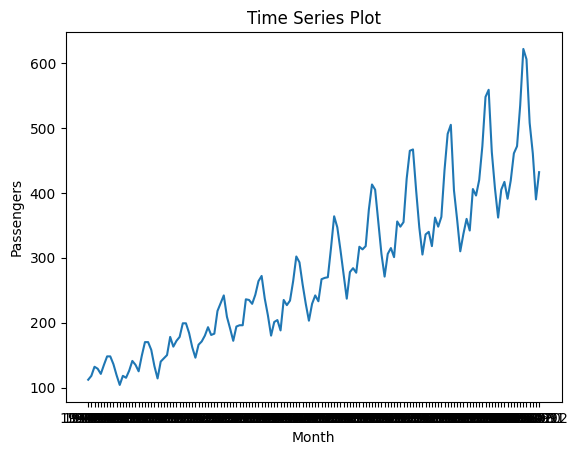

In [18]:
plt.plot(time_series_df['Month'], time_series_df['#Passengers'])

plt.title('Time Series Plot')
plt.xlabel('Month')
plt.ylabel('Passengers')

plt.show()

Rolling Time Series Cross Validation Split

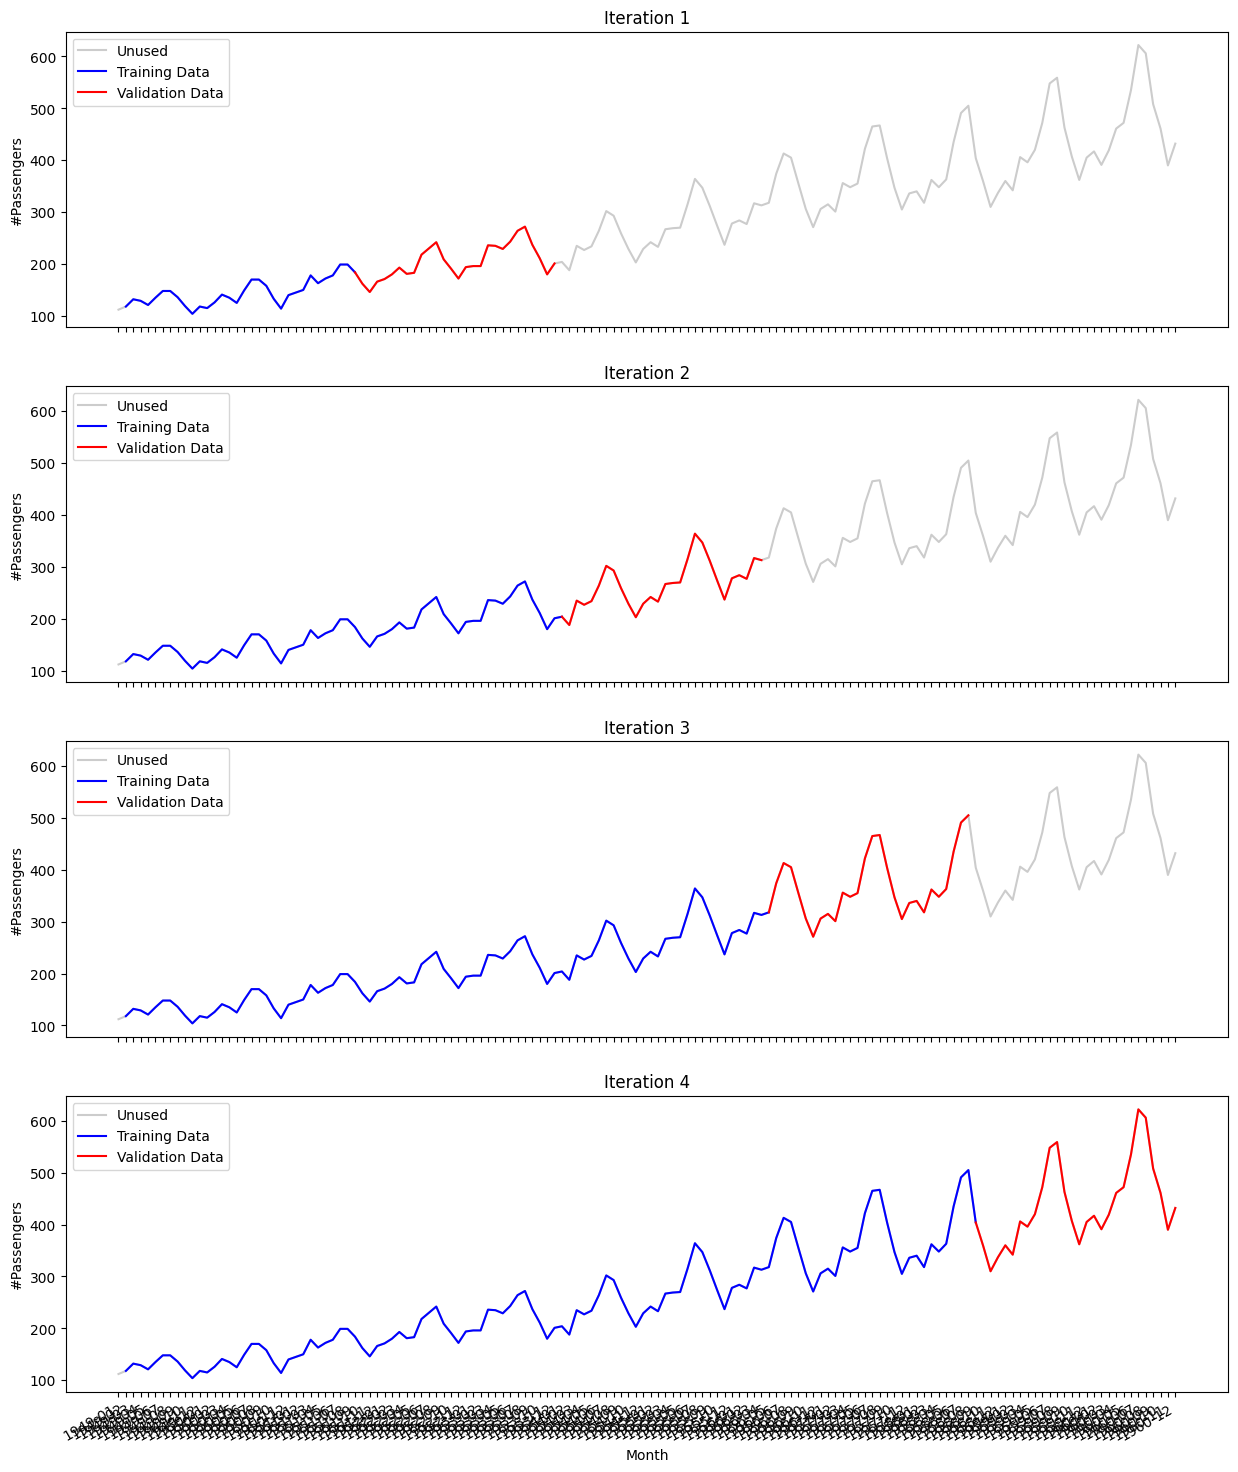

In [17]:
fig, axes = plt.subplots(4, 1, figsize=(15, 20))
folds = TimeSeriesSplit(n_splits=4)
for i, (train_index, test_index) in enumerate(folds.split(time_series_df)):
    plot_title  = 'Iteration ' + str(i+1)
    sns.lineplot(data=time_series_df, x='Month', y='#Passengers', ax=axes[i], label='Unused', color="0.8").set(title = plot_title)
    sns.lineplot(data=time_series_df.iloc[train_index+1], x='Month', y='#Passengers', ax=axes[i], label='Training Data',color="b")
    sns.lineplot(data=time_series_df.iloc[test_index], x='Month', y='#Passengers', ax=axes[i], label='Validation Data',color="r")

fig.autofmt_xdate()
plt.legend()
plt.show()

Blocked Time Series Split

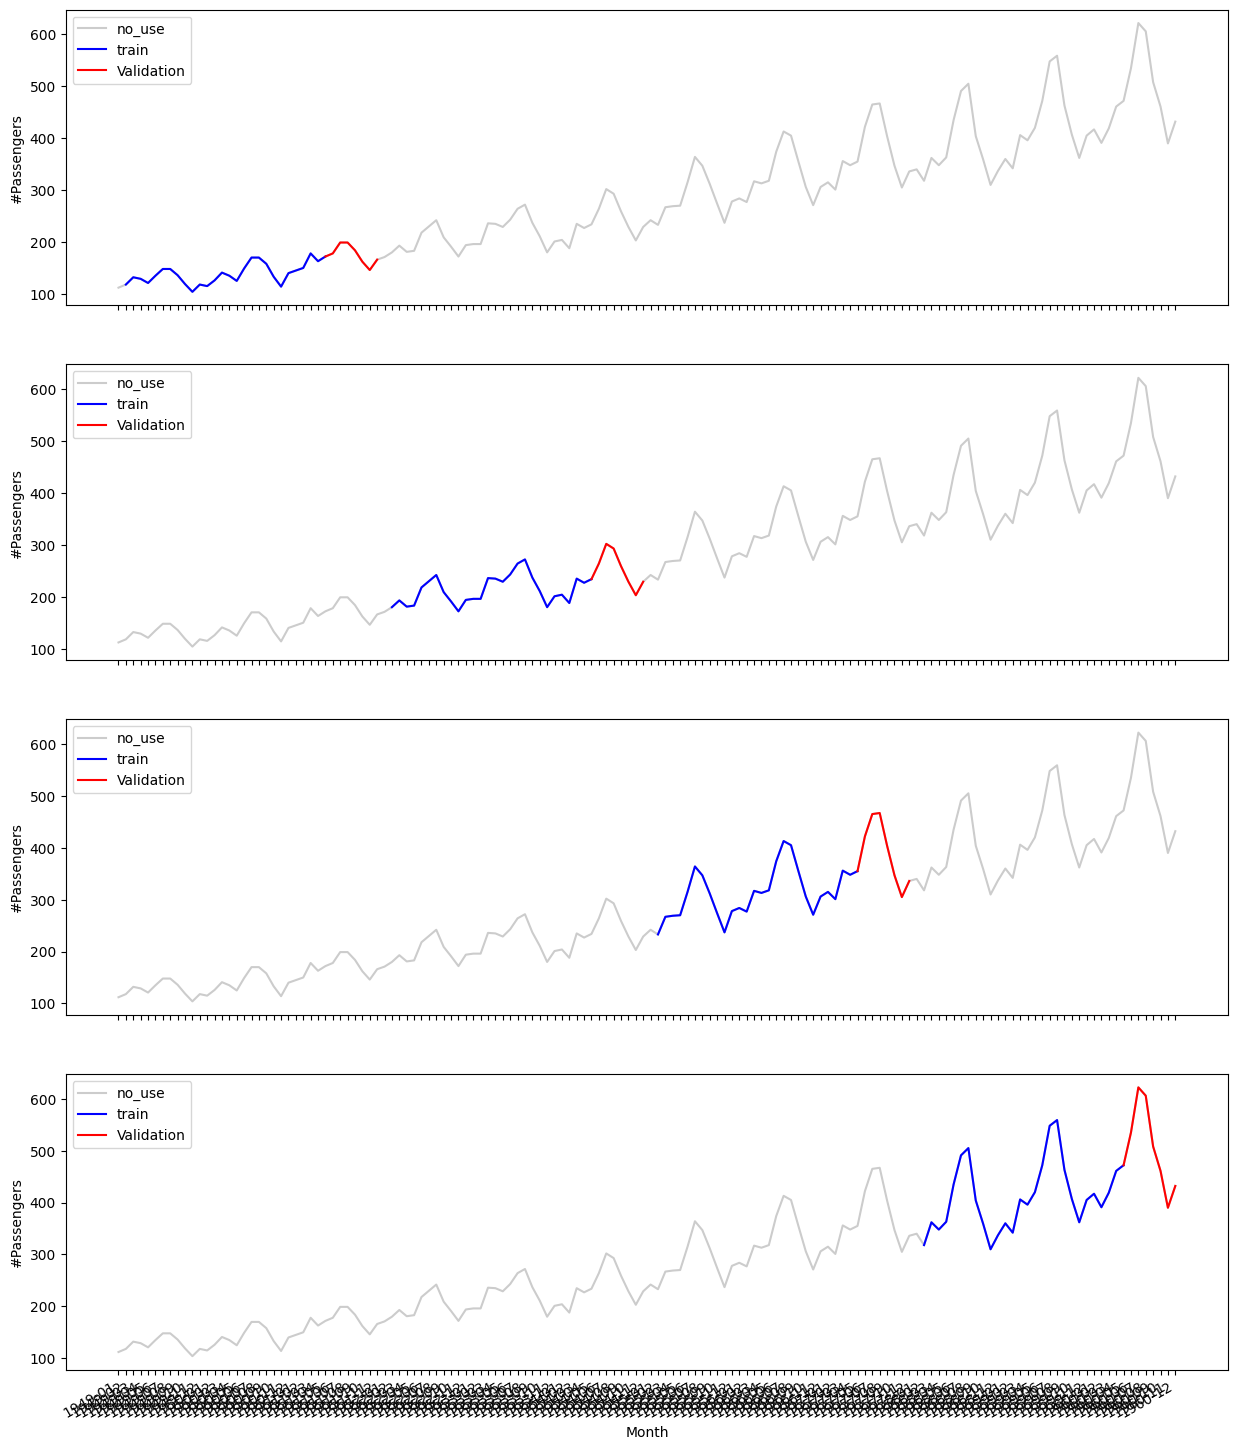

In [20]:
def blocked_time_series_split(df,splits):
    n_samples = len(df)
    folds = n_samples // splits
    indices = np.arange(n_samples)

    margin = 0
    for i in range(splits):
        start = i * folds
        stop = start + folds
        temp = int(0.8 * (stop - start)) + start
        yield indices[start: temp], indices[temp + margin: stop]

fig, axes = plt.subplots(4, 1, figsize=(15, 20))
for i, (train_index, test_index) in enumerate(blocked_time_series_split(time_series_df,4)):
    sns.lineplot(data=time_series_df, x='Month', y='#Passengers', ax=axes[i], label='no_use',color="0.8")
    sns.lineplot(data=time_series_df.iloc[train_index+1], x='Month', y='#Passengers', ax=axes[i], label='train',color="b")
    sns.lineplot(data=time_series_df.iloc[test_index], x='Month', y='#Passengers', ax=axes[i], label='Validation',color="r")


fig.autofmt_xdate()
plt.legend()
plt.show()